In [1]:
!pip install pandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
users = pd.read_csv('Users.csv')
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\szzho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


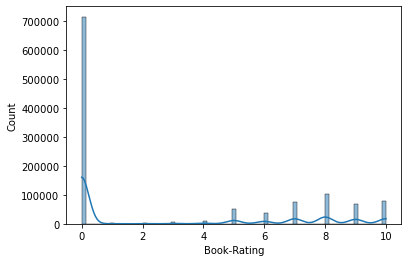

In [7]:
sns.histplot(ratings['Book-Rating'], kde=True)
plt.show()

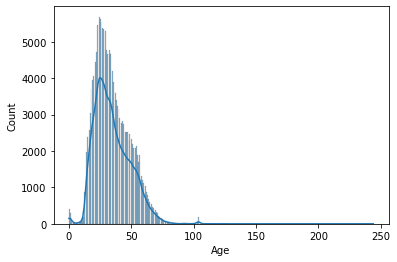

In [8]:
sns.histplot(users['Age'], kde=True)
plt.show()

In [9]:
# Read the CSV files
books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')
users_df = pd.read_csv('Users.csv')

# Count the number of ratings for each book
book_rating_counts = ratings_df['ISBN'].value_counts().reset_index()
book_rating_counts.columns = ['ISBN', 'Rating-Count']

# Filter for books with 50 or more ratings
books_with_50plus_ratings = book_rating_counts[book_rating_counts['Rating-Count'] >= 50]

# Merge this filtered dataset with the original ratings and then with the books dataset
ratings_50plus_df = pd.merge(books_with_50plus_ratings, ratings_df, on="ISBN")
ratings_books_50plus_df = pd.merge(ratings_50plus_df, books_df, on="ISBN")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

C:\Users\szzho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


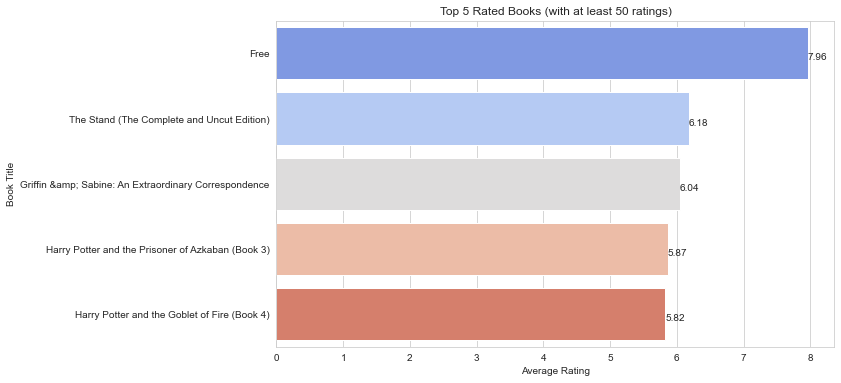

In [10]:
# Top 5 rated books with 50+ ratings
top_rated_books_50plus_df = ratings_books_50plus_df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
top_rated_books_50plus_df = top_rated_books_50plus_df.sort_values('Book-Rating', ascending=False).head(5)

# Visualization for Top 5 Rated Books and Their Ratings
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books_50plus_df, palette='coolwarm')
plt.title('Top 5 Rated Books (with at least 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.1, '{:1.2f}'.format(width), ha="left")

plt.show()

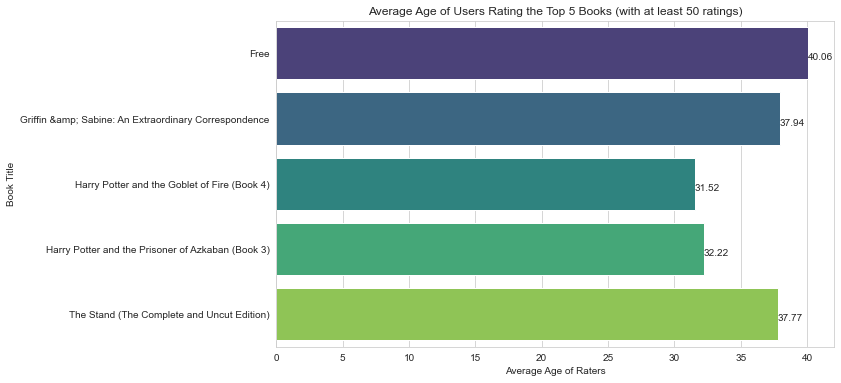

In [11]:
# Merge the top 5 rated books (with 50+ ratings) with user data to find the average age of raters
top_books_ratings_50plus_df = ratings_books_50plus_df[ratings_books_50plus_df['Book-Title'].isin(top_rated_books_50plus_df['Book-Title'])]
top_books_users_age_50plus_df = pd.merge(top_books_ratings_50plus_df, users_df, on="User-ID")

# Calculate the average age for each of the top 5 books
avg_age_top_books_50plus_df = top_books_users_age_50plus_df.groupby('Book-Title')['Age'].mean().reset_index()

# Visualization for Top 5 Rated Books and Average User's Age
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Age', y='Book-Title', data=avg_age_top_books_50plus_df, palette='viridis')
plt.title('Average Age of Users Rating the Top 5 Books (with at least 50 ratings)')
plt.xlabel('Average Age of Raters')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.1, '{:1.2f}'.format(width), ha="left")

plt.show()

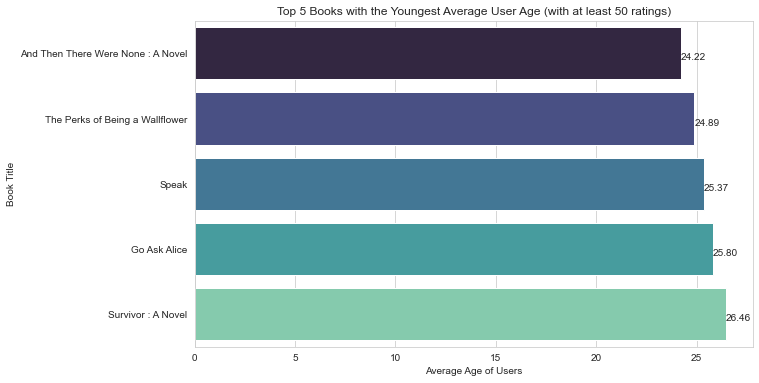

In [12]:
# Calculate the average age of users for each book with 50+ ratings
ratings_books_users_50plus_df = pd.merge(ratings_books_50plus_df, users_df, on="User-ID")
books_avg_age_50plus_df = ratings_books_users_50plus_df.groupby('Book-Title')['Age'].mean().reset_index()

# Top 5 books with the youngest and oldest average user age
top_5_youngest_books_50plus_df = books_avg_age_50plus_df.sort_values('Age').head(5)
top_5_oldest_books_50plus_df = books_avg_age_50plus_df.sort_values('Age', ascending=False).head(5)

# Visualization for Top 5 Books with the Youngest Average User Age
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Age', y='Book-Title', data=top_5_youngest_books_50plus_df, palette='mako')
plt.title('Top 5 Books with the Youngest Average User Age (with at least 50 ratings)')
plt.xlabel('Average Age of Users')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.1, '{:1.2f}'.format(width), ha="left")

plt.show()

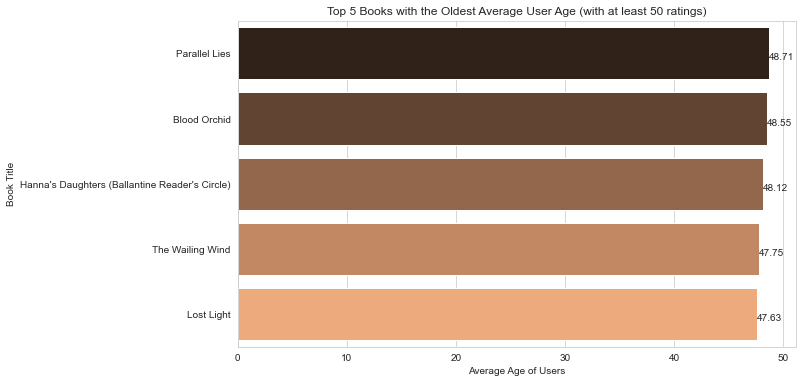

In [13]:
# Visualization for Top 5 Books with the Oldest Average User Age
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Age', y='Book-Title', data=top_5_oldest_books_50plus_df, palette='copper')
plt.title('Top 5 Books with the Oldest Average User Age (with at least 50 ratings)')
plt.xlabel('Average Age of Users')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.1, '{:1.2f}'.format(width), ha="left")

plt.show()

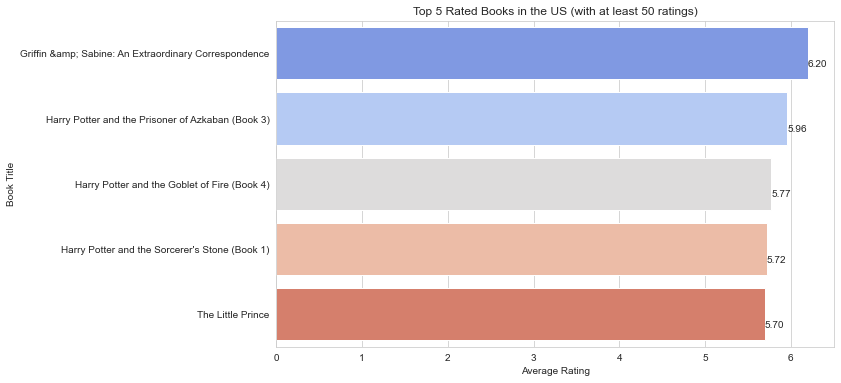

In [14]:
# Filter users from the US and the UK
users_us = users_df[users_df['Location'].str.contains('usa', case=False, na=False)]

# Merge the filtered users with the ratings
ratings_us = pd.merge(users_us, ratings_df, on="User-ID")

# Merge this with the books data
ratings_books_us = pd.merge(ratings_us, books_df, on="ISBN")

# Count the number of ratings for each book in the US and the UK
book_rating_counts_us = ratings_books_us['ISBN'].value_counts().reset_index()
book_rating_counts_us.columns = ['ISBN', 'Rating-Count']

# Filter for books with 50 or more ratings
books_with_50plus_ratings_us = book_rating_counts_us[book_rating_counts_us['Rating-Count'] >= 50]

# Merge this filtered dataset with the original ratings and then with the books dataset
ratings_books_50plus_us = pd.merge(books_with_50plus_ratings_us, ratings_books_us, on="ISBN")

# Top 5 rated books in the US and the UK with 50+ ratings
top_rated_books_50plus_us = ratings_books_50plus_us.groupby('Book-Title')['Book-Rating'].mean().reset_index()
top_rated_books_50plus_us = top_rated_books_50plus_us.sort_values('Book-Rating', ascending=False).head(5)

# Visualization for Top 5 Rated Books in the US and the UK with 50+ ratings
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books_50plus_us, palette='coolwarm')
plt.title('Top 5 Rated Books in the US (with at least 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.2, '{:1.2f}'.format(width), ha="left")

plt.show()


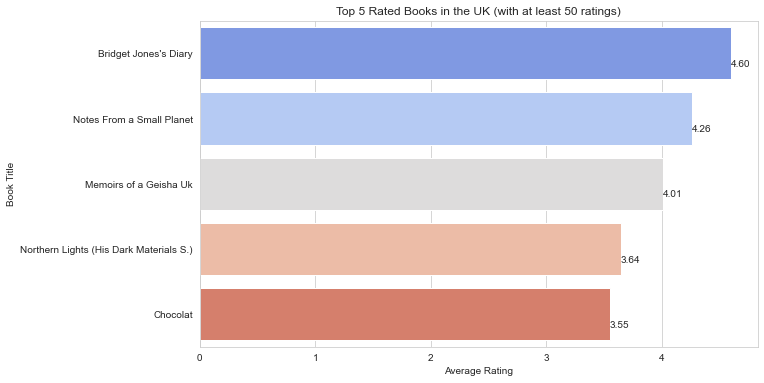

In [15]:
users_uk = users_df[users_df['Location'].str.contains('united kingdom', case=False, na=False)]

# Merge the filtered users with the ratings
ratings_uk = pd.merge(users_uk, ratings_df, on="User-ID")

# Merge this with the books data
ratings_books_uk = pd.merge(ratings_uk, books_df, on="ISBN")

# Count the number of ratings for each book in the US and the UK
book_rating_counts_uk = ratings_books_uk['ISBN'].value_counts().reset_index()
book_rating_counts_uk.columns = ['ISBN', 'Rating-Count']

# Filter for books with 50 or more ratings
books_with_50plus_ratings_uk = book_rating_counts_uk[book_rating_counts_uk['Rating-Count'] >= 50]

# Merge this filtered dataset with the original ratings and then with the books dataset
ratings_books_50plus_uk = pd.merge(books_with_50plus_ratings_uk, ratings_books_uk, on="ISBN")

# Top 5 rated books in the US and the UK with 50+ ratings
top_rated_books_50plus_uk = ratings_books_50plus_uk.groupby('Book-Title')['Book-Rating'].mean().reset_index()
top_rated_books_50plus_uk = top_rated_books_50plus_uk.sort_values('Book-Rating', ascending=False).head(5)

# Visualization for Top 5 Rated Books in the US and the UK with 50+ ratings
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books_50plus_uk, palette='coolwarm')
plt.title('Top 5 Rated Books in the UK (with at least 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')

# Adding the text on the bars
for p in chart.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height()/2. + 0.2, '{:1.2f}'.format(width), ha="left")

plt.show()